POC - Proof of Concepts

# New Section

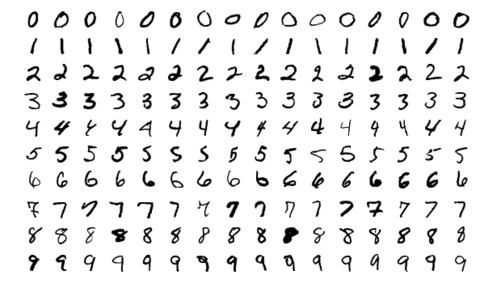

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full[0].shape

(28, 28)

In [5]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

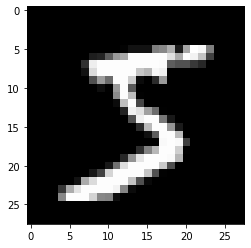

In [6]:
plt.imshow(X_train_full[0], cmap = 'gray')

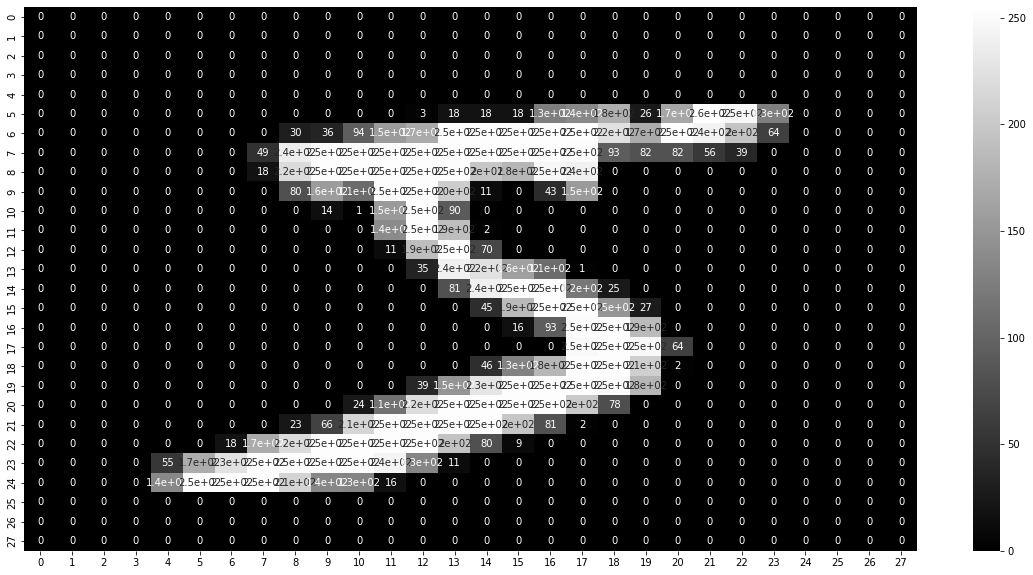

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_train_full[0], annot = True, cmap='gray')

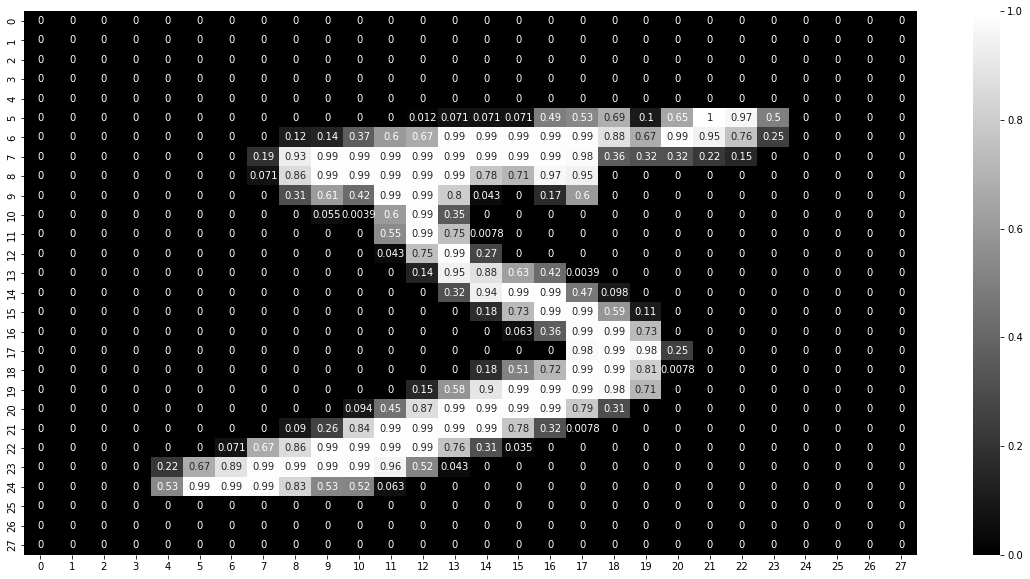

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_train_full[0]/255, annot = True, cmap='gray')

In [9]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
classes = len(np.unique(y_train))

In [11]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputlayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1"),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2"),
    tf.keras.layers.Dense(classes, activation="softmax", name="outputlayer")
]

In [12]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [13]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']
model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [15]:
VALIDATION_DATA = (X_valid, y_valid)
EPOCHS = 30
history = model_clf.fit(
    x = X_train,
    y = y_train,
    epochs=EPOCHS,
    batch_size = 32,
    validation_data = VALIDATION_DATA
)

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6138 - accuracy: 0.8393 - val_loss: 0.3109 - val_accuracy: 0.9152
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2921 - accuracy: 0.9167 - val_loss: 0.2449 - val_accuracy: 0.9326
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2385 - accuracy: 0.9317 - val_loss: 0.2039 - val_accuracy: 0.9422
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2030 - accuracy: 0.9420 - val_loss: 0.1786 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1766 - accuracy: 0.9497 - val_loss: 0.1597 - val_accuracy: 0.9564
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1564 - accuracy: 0.9559 - val_loss: 0.1445 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1398 - accuracy: 0.9609 - val_loss: 0.1376 - val_accuracy

In [16]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.613803,0.839327,0.310944,0.9152
1,0.292065,0.916727,0.244923,0.9326
2,0.238534,0.931673,0.203864,0.9422
3,0.202970,0.941982,0.178636,0.9494
4,0.176628,0.949709,0.159663,0.9564
5,0.156378,0.955855,0.144500,0.9614
6,0.139757,0.960945,0.137569,0.9622
7,0.126185,0.964855,0.124819,0.9658
8,0.115330,0.967273,0.115783,0.9660
9,0.105821,0.969818,0.108818,0.9692


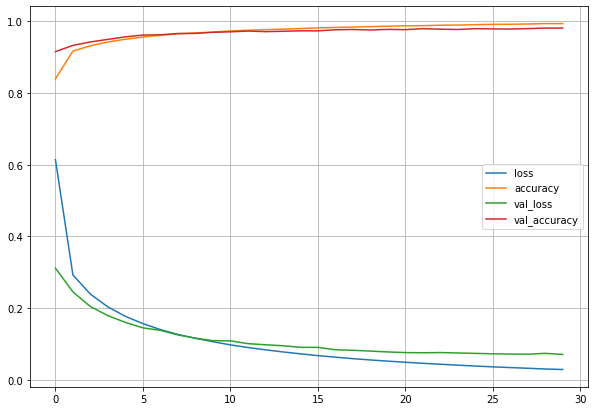

In [17]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.legend()
plt.grid(True)

In [18]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.2201 - accuracy: 0.9740


[13.220134735107422, 0.9739999771118164]

In [19]:
model_clf.save('mnist_full.h5')

In [20]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)


1/1 [==============================] - 0s 91ms/step


In [21]:
X_new.shape

(3, 28, 28)

In [22]:
y_prob.shape

(3, 10)

In [23]:
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

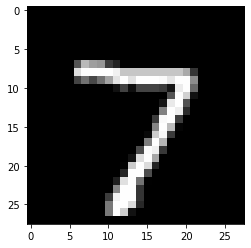

In [25]:
plt.imshow(X_new[0], cmap = 'gray')

In [26]:
Y_pred = np.argmax(y_prob, axis = -1)
Y_pred

array([7, 2, 1])

In [27]:
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [28]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [29]:
for kohil, dhoni, dravid in zip([1,2,3],[3,4,5],[6,7,8]):
  print(kohil, dhoni, dravid)

1 3 6
2 4 7
3 5 8


In [30]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

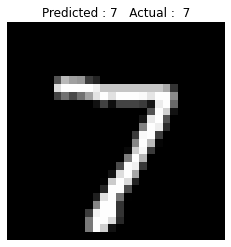

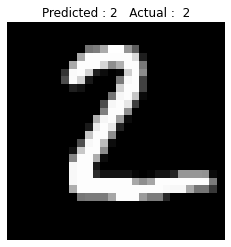

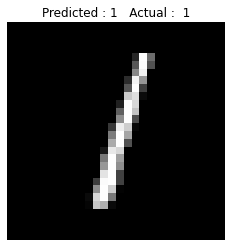

In [31]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap = 'gray')
  plt.title(f'Predicted : {pred}   Actual :  {actual}')
  plt.axis('off')
  print("\n")
  plt.show()

# Transfer Learning

In [32]:
pre_trained_model = tf.keras.models.load_model('mnist_full.h5')

In [33]:
for i in pre_trained_model.layers:
  print(i.name, ':', i.trainable)

inputlayer : True
hiddenlayer1 : True
hiddenlayer2 : True
outputlayer : True


In [34]:
for i in pre_trained_model.layers[:-1]:
  i.trainable = False

In [35]:
for i in pre_trained_model.layers:
  print(i.name, ':', i.trainable)

inputlayer : False
hiddenlayer1 : False
hiddenlayer2 : False
outputlayer : True


In [36]:
low_trained_model = pre_trained_model.layers[:-1]

In [37]:
new_model = tf.keras.Sequential(low_trained_model)

In [38]:
new_model.add(
    tf.keras.layers.Dense(2, activation='softmax')
)

In [39]:
def update_even_odd_values(arr):
  for idx, labels in enumerate(arr):
    arr[idx] = np.where(labels%2 == 0, 1, 0)
  return arr

In [40]:
k = np.array([1,2,3,4,5,6,7,8])

In [41]:
update_even_odd_values(k)

array([0, 1, 0, 1, 0, 1, 0, 1])

In [42]:
k

array([0, 1, 0, 1, 0, 1, 0, 1])

In [43]:
y_train, y_test, y_valid = update_even_odd_values([y_train, y_test, y_valid])

In [44]:
y_train.shape

(55000,)

In [45]:
np.unique(y_train)

array([0, 1])

In [46]:
np.unique(y_test)

array([0, 1])

In [47]:
np.unique(y_valid)

array([0, 1])

In [48]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

In [49]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [50]:
new_model.compile(loss=LOSS,
                  optimizer=OPTIMIZER,
                  metrics = METRICS)

In [51]:
history = new_model.fit(
    x = X_train,
    y = y_train, 
    validation_data  = (X_valid, y_valid),
    epochs = 10
)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1810 - accuracy: 0.9332 - val_loss: 0.1274 - val_accuracy: 0.9574
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1205 - accuracy: 0.9583 - val_loss: 0.1116 - val_accuracy: 0.9616
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1089 - accuracy: 0.9622 - val_loss: 0.1050 - val_accuracy: 0.9644
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9641 - val_loss: 0.1037 - val_accuracy: 0.9660
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0986 - accuracy: 0.9655 - val_loss: 0.1029 - val_accuracy: 0.9670
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0959 - accuracy: 0.9665 - val_loss: 0.0962 - val_accuracy: 0.9680
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0937 - accuracy: 0.9670 - val_loss: 0.0939 - val_accuracy:

In [52]:
new_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.0043 - accuracy: 0.9670


[13.004271507263184, 0.9670000076293945]

In [53]:
X_new = X_test[:3]

In [54]:
y_predict = new_model.predict(X_new)

1/1 [==============================] - 0s 58ms/step


In [55]:
y_predict

array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [56]:
y_pred = np.argmax(y_predict, axis=-1)
y_pred

array([0, 1, 0])

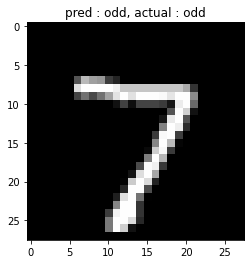

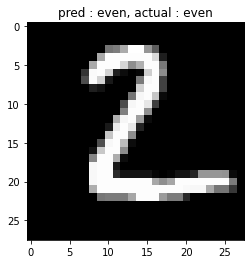

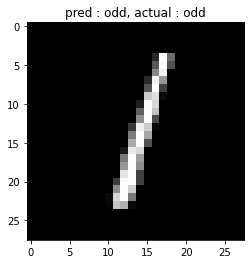

In [57]:
for img_array, pred, actual in zip(X_test[:3], y_pred, y_test[:3]):
  if pred == 1:
    pred_result = 'even'
  else:
    pred_result = 'odd'
  if actual == 1:
    actual_result = 'even'
  else:
    actual_result = 'odd'
  plt.imshow(img_array, cmap = 'gray')
  plt.title(f'pred : {pred_result}, actual : {actual_result}')
  plt.show()

# CNN Model

In [58]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [59]:
X_train_full.shape

(60000, 28, 28)

In [60]:
y_train.shape

(55000,)

In [61]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

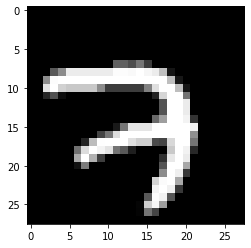

In [62]:
plt.imshow(X_train[0], cmap = 'gray')

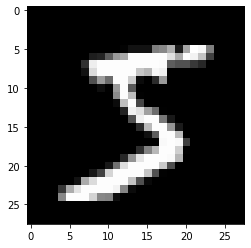

In [63]:
plt.imshow(X_train_full[0], cmap = 'gray')

In [64]:
classes = len(np.unique(y_train))

In [65]:
classes

10

In [66]:
X_train.shape

(55000, 28, 28)

In [67]:
X_train[0].shape

(28, 28)

In [68]:
X_train = np.expand_dims(X_train, -1)

In [69]:
X_train.shape

(55000, 28, 28, 1)

In [70]:
X_train[0].shape

(28, 28, 1)

In [71]:
X_valid = np.expand_dims(X_valid, -1)

In [72]:
X_test = np.expand_dims(X_test, -1)

In [73]:
input_shape = (28, 28, 1)

In [74]:
LAYERS = [
    tf.keras.Input(shape = input_shape),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(classes, activation = 'softmax')
  ]

In [75]:
model_clf = tf.keras.Sequential(LAYERS)

In [76]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

In [77]:
model_clf.compile(
    loss = LOSS,
    optimizer = OPTIMIZER,
    metrics = METRICS
)

In [78]:
history = model_clf.fit(
    x = X_train, 
    y = y_train,
    validation_data = (X_valid, y_valid),
    epochs = 30
)

Epoch 1/30
1719/1719 [==============================] - 50s 29ms/step - loss: 0.5650 - accuracy: 0.8366 - val_loss: 0.2021 - val_accuracy: 0.9424
Epoch 2/30
1719/1719 [==============================] - 50s 29ms/step - loss: 0.1713 - accuracy: 0.9500 - val_loss: 0.1344 - val_accuracy: 0.9642
Epoch 3/30
1719/1719 [==============================] - 50s 29ms/step - loss: 0.1227 - accuracy: 0.9636 - val_loss: 0.1036 - val_accuracy: 0.9718
Epoch 4/30
1719/1719 [==============================] - 50s 29ms/step - loss: 0.1011 - accuracy: 0.9691 - val_loss: 0.0912 - val_accuracy: 0.9736
Epoch 5/30
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0869 - accuracy: 0.9737 - val_loss: 0.0781 - val_accuracy: 0.9760
Epoch 6/30
1719/1719 [==============================] - 52s 30ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0773 - val_accuracy: 0.9768
Epoch 7/30
1719/1719 [==============================] - 52s 30ms/step - loss: 0.0712 - accuracy: 0.9779 - val_loss: 0.0797 -

In [79]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.564953,0.836582,0.202080,0.9424
1,0.171288,0.950018,0.134369,0.9642
2,0.122672,0.963636,0.103650,0.9718
3,0.101082,0.969145,0.091203,0.9736
4,0.086920,0.973745,0.078143,0.9760
5,0.078660,0.975618,0.077259,0.9768
6,0.071150,0.977855,0.079690,0.9758
7,0.065802,0.979891,0.067589,0.9804
8,0.061836,0.981327,0.065385,0.9798
9,0.058188,0.982236,0.060599,0.9824


In [80]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [81]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 7.3001 - accuracy: 0.9862


[7.300075054168701, 0.9861999750137329]

In [82]:
model_clf.save('mnist_cnn.h5')

# Transfer Learning

In [123]:
pre_trained_model = tf.keras.models.load_model('mnist_cnn.h5')

In [124]:
for layers in pre_trained_model.layers:
  print(layers.name, layers.trainable)

conv2d True
max_pooling2d True
conv2d_1 True
max_pooling2d_1 True
flatten True
dense_1 True


In [125]:
pre_trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [128]:
pre_trained_model.layers

In [129]:
for layer in pre_trained_model.layers:
    print(layer,"is trainable::", layer.trainable)

<keras.layers.convolutional.conv2d.Conv2D object at 0x7efd02fac160> is trainable:: True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7efd02facee0> is trainable:: True
<keras.layers.convolutional.conv2d.Conv2D object at 0x7efd0301b2e0> is trainable:: True
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7efd0301bb80> is trainable:: True
<keras.layers.reshaping.flatten.Flatten object at 0x7efd02fac3d0> is trainable:: True
<keras.layers.core.dense.Dense object at 0x7efd0c4900a0> is trainable:: True


In [130]:
pre_trained_model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [131]:
pre_trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [132]:
def set_trainable_weight_false(model):
    for layer in model.layers[:-1]:
        layer.trainable = False
    return model

In [133]:
tranf_cnn_model = set_trainable_weight_false(pre_trained_model)

In [134]:
tranf_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [135]:
tranf_cnn_model.compile(loss=LOSS,
                  optimizer=OPTIMIZER,
                  metrics = METRICS)

In [137]:
def update_even_odd_values(arr):
  for idx, labels in enumerate(arr):
    arr[idx] = np.where(labels%2 == 0, 1, 0)
  return arr

In [139]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_values([y_train, y_test, y_valid])

In [141]:
history = tranf_cnn_model.fit(X_train, y_train_bin, epochs=10, batch_size=40, validation_data =(X_valid,y_valid_bin))


Epoch 1/10
1375/1375 [==============================] - 17s 12ms/step - loss: 0.5493 - accuracy: 0.7862 - val_loss: 0.3613 - val_accuracy: 0.9932
Epoch 2/10
1375/1375 [==============================] - 17s 12ms/step - loss: 0.2724 - accuracy: 0.9952 - val_loss: 0.2122 - val_accuracy: 0.9932
Epoch 3/10
1375/1375 [==============================] - 17s 13ms/step - loss: 0.1744 - accuracy: 0.9953 - val_loss: 0.1491 - val_accuracy: 0.9932
Epoch 4/10
1375/1375 [==============================] - 18s 13ms/step - loss: 0.1281 - accuracy: 0.9953 - val_loss: 0.1158 - val_accuracy: 0.9932
Epoch 5/10
1375/1375 [==============================] - 20s 15ms/step - loss: 0.1017 - accuracy: 0.9953 - val_loss: 0.0955 - val_accuracy: 0.9934
Epoch 6/10
1375/1375 [==============================] - 17s 13ms/step - loss: 0.0848 - accuracy: 0.9953 - val_loss: 0.0821 - val_accuracy: 0.9934
Epoch 7/10
1375/1375 [==============================] - 17s 12ms/step - loss: 0.0732 - accuracy: 0.9953 - val_loss: 0.0725 -

In [143]:
tranf_cnn_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 4s 13ms/step - loss: 0.0629 - accuracy: 0.9928


[0.06287164986133575, 0.9927999973297119]

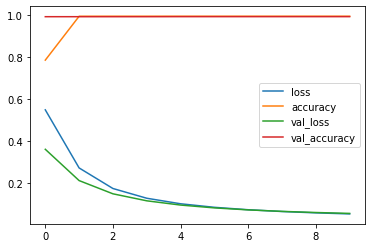

In [145]:
pd.DataFrame(history.history).plot()

In [157]:
y_pred = tranf_cnn_model.predict(X_test)

313/313 [==============================] - 5s 16ms/step


In [158]:
y_pred

array([[0.96390307, 0.03609692],
       [0.04390222, 0.95609784],
       [0.9674059 , 0.03259403],
       ...,
       [0.0457654 , 0.95423466],
       [0.9600785 , 0.03992156],
       [0.04118445, 0.9588155 ]], dtype=float32)

In [159]:
y_pred_index = np.argmax(y_pred, axis = 1)

In [160]:
y_pred_index

array([0, 1, 0, ..., 1, 0, 1])

In [170]:
y_pred_index.shape

(10000,)

In [164]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_bin, y_pred_index)

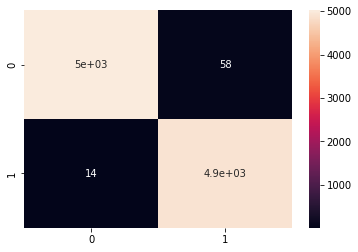

In [165]:
sns.heatmap(cm, annot = True)